In [1]:
%pip install matplotlib
%pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install moviepy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import math
import numpy as np


fourDvertices = [
    [0,0,0,0],
    [0,0,0,1],
    [0,0,1,0],
    [0,0,1,1],
    [0,1,0,0],
    [0,1,0,1],
    [0,1,1,0],
    [0,1,1,1],
    [1,0,0,0],
    [1,0,0,1],
    [1,0,1,0],
    [1,0,1,1],
    [1,1,0,0],
    [1,1,0,1],
    [1,1,1,0],
    [1,1,1,1],
]


def rotate_4d_point(point, degrees, plane):
    # Convert degrees to radians
    radians = math.radians(degrees)
    
    # Define the rotation matrices
    if plane == 'xy':
        rotation_matrix = np.array([
            [math.cos(radians), -math.sin(radians), 0, 0],
            [math.sin(radians), math.cos(radians), 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])
    elif plane == 'xz':
        rotation_matrix = np.array([
            [math.cos(radians), 0, -math.sin(radians), 0],
            [0, 1, 0, 0],
            [math.sin(radians), 0, math.cos(radians), 0],
            [0, 0, 0, 1]
        ])
    elif plane == 'xw':
        rotation_matrix = np.array([
            [math.cos(radians), 0, 0, -math.sin(radians)],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [math.sin(radians), 0, 0, math.cos(radians)]
        ])
    elif plane == 'yz':
        rotation_matrix = np.array([
            [1, 0, 0, 0],
            [0, math.cos(radians), -math.sin(radians), 0],
            [0, math.sin(radians), math.cos(radians), 0],
            [0, 0, 0, 1]
        ])
    elif plane == 'yw':
        rotation_matrix = np.array([
            [1, 0, 0, 0],
            [0, math.cos(radians), 0, -math.sin(radians)],
            [0, 0, 1, 0],
            [0, math.sin(radians), 0, math.cos(radians)]
        ])
    elif plane == 'zw':
        rotation_matrix = np.array([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, math.cos(radians), -math.sin(radians)],
            [0, 0, math.sin(radians), math.cos(radians)]
        ])

    pointnp = np.array(point)
    return list(np.matmul(pointnp, rotation_matrix))


def fourDto3D(fourDvertices):
    threeD = []
    for vertex in fourDvertices:
        threeD.append([vertex[0], vertex[1], vertex[2]])
    return threeD



In [5]:
import plotly.graph_objects as go




def plot(vertices):
    # Helper function to add face vertices and indices
    def add_face(face):
        idx = len(x_faces) // 3
        for vertex in face:
            x_faces.append(vertex[0])
            y_faces.append(vertex[1])
            z_faces.append(vertex[2])
        i_faces.append(idx)
        j_faces.append(idx + 1)
        k_faces.append(idx + 2)
        i_faces.append(idx)
        j_faces.append(idx + 2)
        k_faces.append(idx + 3)

    # Define the 12 edges of the shape
    edges = [

    ]

    # Define the 6 faces of the shape
    faces = [

    ]

    # Create a plotly figure
    fig = go.Figure()

    # Add vertices
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices]
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=5, color='blue')))

    # Add edges
    for edge in edges:
        fig.add_trace(go.Scatter3d(
            x=[edge[0][0], edge[1][0]], 
            y=[edge[0][1], edge[1][1]], 
            z=[edge[0][2], edge[1][2]], 
            mode='lines',
            line=dict(color='black', width=2)
        ))

    # Add faces
    x_faces = []
    y_faces = []
    z_faces = []
    i_faces = []
    j_faces = []
    k_faces = []

    # 
    for face in faces:
        add_face(face)

    fig.add_trace(go.Mesh3d(
        x=x_faces,
        y=y_faces,
        z=z_faces,
        i=i_faces,
        j=j_faces,
        k=k_faces,
        opacity=0.5,
        color='cyan'
    ))

    # Update the layout
    fig.update_layout(scene=dict(
        xaxis=dict(nticks=4, range=[-1, 2]),
        yaxis=dict(nticks=4, range=[-1, 2]),
        zaxis=dict(nticks=4, range=[-1, 2])
    ))

    # Show the figure
    fig.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mov

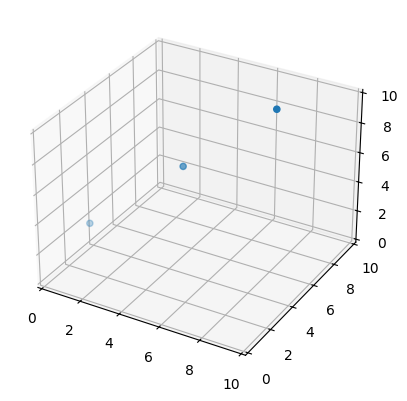

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Sample data structure: T = [[I1], [I2], ..., [In]] where I is a list of 3D points
T = [
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[1.1, 2.1, 3.1], [4.1, 5.1, 6.1], [7.1, 8.1, 9.1]],
    # Add more frames here
]

# Number of frames
num_frames = len(T)
# Number of points
num_points = len(T[0])

# Create a figure and a 3D Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize the scatter plot
sc = ax.scatter([], [], [])

# Set the axes properties
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.set_zlim((0, 10))

def init():
    """Initialize the scatter plot."""
    sc._offsets3d = ([], [], [])
    return sc,

def update(frame):
    """Update the scatter plot for each frame."""
    data = T[frame]
    x = [point[0] for point in data]
    y = [point[1] for point in data]
    z = [point[2] for point in data]
    sc._offsets3d = (x, y, z)
    return sc,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)

# Save the animation as a video file
ani.save('movement.mov', writer='ffmpeg', fps=2)

plt.show()


In [ ]:
for i in range(9):
    c = ( i+1 ) * 10
    xy = rotate_4d_point(fourDvertices, c, "xy")
    xz = rotate_4d_point(xy, c, "xz")
    xw = rotate_4d_point(xz, c, "xw")
    yz = rotate_4d_point(xw, c, "yz")
    yw = rotate_4d_point(yz, c, "yw")
    zw = rotate_4d_point(yw, c, "zw")
    vertices = fourDto3D(zw)
    plot(vertices)